In [1]:
# import module
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import itertools


# set directry
os.chdir('/Users/celerinoue/0_res/CTOS/')

# load

In [2]:
# load the data
def data_load():
    # [LOAD] ECv data
    file_1 = 'data/ECv_network_result_0.15.txt'
    data_ecv_ = pd.read_table(file_1, sep='\t', header=0)
    print(f'[LOAD]: {file_1}, input matrix: {data_ecv_.shape}')

    # [LOAD] tumor growth rate data (TGR data, drug1~7)
    file_2 = 'result/txt/IDEA1_1/tumor_growth_rate.pickle'
    with open(file_2, 'rb') as f:
        list_tgr_ = pickle.load(f)
        print(f'[LOAD]: {file_2}, list length: {len(list_tgr_)}')

    # [LOAD] drug name list
    file_3 = 'result/txt/drug_index.csv'
    data_drug_name = pd.read_csv(file_3, sep=',', header=0, index_col=0)
    print(f'[LOAD]: {file_3}, input matrix: {data_drug_name.shape}')

    return data_ecv_, list_tgr_, data_drug_name

data_ecv_, list_tgr_, data_drug_name = data_load()

[LOAD]: data/ECv_network_result_0.15.txt, input matrix: (78859, 52)
[LOAD]: result/txt/IDEA1_1/tumor_growth_rate.pickle, list length: 7
[LOAD]: result/txt/drug_index.csv, input matrix: (7, 2)


In [3]:
data_ecv_

,Parent,Child,id,parent.id,child.id,edgeScore,Freq,Count,bspline,gain,...,parent.Count,child.Count,parent.bndc.parents.continuous,child.bndc.parents.continuous,parent.bndc.parents.discrete,child.bndc.parents.discrete,parent.mean,child.mean,parent.variance,child.variance
0,ITGA7,A23747,1,4555,1,0.357812,0.357812,22755,7.5167384:12.3292597:5.8895823:6.0121836:6.134...,-1.145007,...,169342,301263,0:92:422,4554:717:422:8167:3498,NaN,NaN,0.0,0.0,0.096235,0.111883
1,AXL,A23747,2,718,1,0.502290,0.502290,21832,7.1259124:11.0074875:-0.1042063:-0.0814324:-0....,3.753151,...,155587,301263,0:422:576:5462:11261,4554:717:422:8167:3498,NaN,NaN,0.0,0.0,0.037213,0.111883
2,AP1M2,A23747,3,423,1,0.543966,0.543966,25338,4.9612921:11.2914667:1.8975486:1.7688303:1.640...,-2.579039,...,381560,301263,1999:2205:8490:2866,4554:717:422:8167:3498,NaN,NaN,0.0,0.0,0.154004,0.111883
3,SLAMF1,A23747,4,8168,1,0.270219,0.270219,14640,5.1113257:7.9960721:-0.9513332:-0.7884424:-0.6...,-10.944180,...,93327,301263,0:1364:2207:3024:3330:3542:4891:5210:6933:11050,4554:717:422:8167:3498,NaN,NaN,0.0,0.0,0.039766,0.111883
4,FBLN1,A23747,5,3499,1,0.244207,0.244207,20024,5.5211898:12.0383133:-0.3399919:-0.2614925:-0....,-1.610999,...,178453,301263,9728:11545:0:2289,4554:717:422:8167:3498,NaN,NaN,0.0,0.0,0.221385,0.111883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78854,NACAP1,lincRNA:chrX:97546119-97657219_F,78855,6014,11963,0.504334,0.504334,32185,10.6529067:13.7148702:-0.5116253:-0.4658062:-0...,5.499309,...,231457,340505,8987:11962:1089:1927:2403,770:792:1089:6013:11047,NaN,NaN,0.0,0.0,0.022078,0.023374
78855,lincRNA:chr2:107293518-107358418_R,lincRNA:chrX:97546119-97657219_F,78856,11048,11963,0.383769,0.383769,25987,13.9138869:16.4268687:-1.0585435:-0.9773662:-0...,-2.249494,...,218504,340505,739:11434:11962,770:792:1089:6013:11047,NaN,NaN,0.0,0.0,0.008758,0.023374
78856,A_24_P126691,lincRNA:chrX:97546119-97657219_R,78857,732,11964,0.186317,0.186317,16225,12.3478075:16.1191996:12.4532644:12.4563336:12...,8.259415,...,287171,112891,1024:739:2926,731:1552:11046,NaN,NaN,0.0,0.0,0.008981,0.016659
78857,C1orf43,lincRNA:chrX:97546119-97657219_R,78858,1553,11964,0.572742,0.572742,29797,9.3352143:12.6318660:-0.1781475:-0.1624438:-0....,7.537833,...,827076,112891,928:7958,731:1552:11046,NaN,NaN,0.0,0.0,0.026167,0.016659


In [4]:
# reshape
def reshape(data_ecv_, list_tgr_):
    # reshape data_ecv
    data_ecv = data_ecv_.loc[:, ['Parent',
                                 'Child',
                                 'ECv:C97-float:8',  # CTOS_line = 1
                                 'ECv:C166-float:21',  # CTOS_line = 2
                                 'ECv:C86-float:17',  # CTOS_line = 3
                                 'ECv:C111-foat:18',  # CTOS_line = 4
                                 'ECv:C45-float:5',  # CTOS_line = 5
                                 'ECv:C48-float:6',  # CTOS_line = 6
                                 'ECv:C138-float:20',  # CTOS_line = 7
                                 'ECv:CB3-float:22',  # CTOS_line = 8
                                 'ECv:C75-float:7',  # CTOS_line = 9
                                 'ECv:C132-float:19'  # CTOS_line = 10
                                 ]]  # 必要なedgeを抽出

    # reshape list_tgr
    list_tgr_d28 = []
    for i in range(len(list_tgr_)):
        tgr_d28_ = list_tgr_[i].iloc[:, 8:]
        list_tgr_d28.append(tgr_d28_)

    print('[INFO] reshape the data')
    return data_ecv, list_tgr_d28


data_ecv, list_tgr_d28 = reshape(data_ecv_, list_tgr_)

[INFO] reshape the data


In [5]:
data_ecv

,Parent,Child,ECv:C97-float:8,ECv:C166-float:21,ECv:C86-float:17,ECv:C111-foat:18,ECv:C45-float:5,ECv:C48-float:6,ECv:C138-float:20,ECv:CB3-float:22,ECv:C75-float:7,ECv:C132-float:19
0,ITGA7,A23747,6.594815,6.345684,6.332206,6.537262,6.373183,6.657370,6.412025,6.539362,6.445698,6.374509
1,AXL,A23747,-0.047771,-0.039535,-0.015503,-0.028371,-0.032229,-0.068649,-0.015117,0.059047,-0.061376,-0.008655
2,AP1M2,A23747,-0.392876,0.091723,-0.200845,-0.231564,-0.265686,-0.224587,-0.127154,-0.075489,-0.166920,-0.368507
3,SLAMF1,A23747,0.129603,-0.259722,-0.175755,0.067454,-0.788439,-0.312984,-0.299465,-0.210768,-0.430493,0.224160
4,FBLN1,A23747,-0.178458,-0.196188,-0.124905,-0.170777,-0.081411,-0.161160,-0.134623,0.302383,-0.153786,-0.150178
...,...,...,...,...,...,...,...,...,...,...,...,...
78854,NACAP1,lincRNA:chrX:97546119-97657219_F,0.122925,-0.000558,-0.144826,-0.103876,0.001169,0.086230,-0.059603,0.053983,0.258925,-0.065045
78855,lincRNA:chr2:107293518-107358418_R,lincRNA:chrX:97546119-97657219_F,0.009782,0.054173,-0.227011,0.016717,-0.042315,0.107339,0.158652,0.257222,0.384503,0.093524
78856,A_24_P126691,lincRNA:chrX:97546119-97657219_R,12.492665,12.495724,12.495261,12.496654,12.493486,12.494454,12.497193,12.503603,12.505451,12.498717
78857,C1orf43,lincRNA:chrX:97546119-97657219_R,0.040848,0.031341,0.047562,0.029576,0.048071,-0.001850,0.039658,0.040479,0.053610,0.055074


In [6]:
# calculate correlation between ECv and TGR, and plot distribution
def corrplot(data_ecv, data_drug_name, list_tgr_d28):
    list_corr_ = []
    for d, i in itertools.product(range(len(data_drug_name['drug_name'])), range(len(data_ecv))):
        # array tumor growth rate
        array_tgr = np.array(list_tgr_d28[d], dtype='float64').reshape(
            10,)  # drug 0~6 → 1
        # array ecv
        array_ecv = np.array(
            data_ecv.iloc[i, 2:], dtype='float64')  # ecv 0~78858 → 1
        # corr
        corr = np.corrcoef(array_tgr, array_ecv)[0, 1]
        # append
        list_corr_.append(corr)
    #reshape
    list_corr = np.array(list_corr_).reshape(len(data_drug_name['drug_name']), -1)
    print(f'[CAL]: correlation between ECv and TGR, shape:{list_corr.shape}')

    #for l in range(len(list_corr)):
        # (Cetuximab, Oxaliplatin, Irinotecan) = (green, blue, red)
        #colorlist = ["#999999", "#9BC99B", "#3FBF3F", "#9BA7C9", "#3F5FBF", "#D88C8C", "#BF3F3F"]
        # plot
        #plt.figure(figsize=(30, 15))
        #plt.rcParams["font.family"] = 'sans-serif'
        #plt.rcParams['font.size'] = 25
        #plt.title(f'Distribution of Correlation Coefficients [{data_drug_name["drug_name"][l]}]', fontsize=30)
        #plt.xlabel('Correlation coefficients between tumor growth rate [day28] and every ECv', fontsize=25)
        #plt.ylabel('Count', fontsize=25)
        #sns.distplot(list_corr[l], color=colorlist[l], kde=False)
        # save
        #savepath = f'./result/fig/IDEA1_2/fig_corrplot_{data_drug_name["drug_name"][l]}.png'
        #plt.savefig(savepath, dpi=300, format='png', bbox_inches="tight")
        #print(f'[SAVE]: {savepath}')
    return list_corr

list_corr = corrplot(data_ecv, data_drug_name, list_tgr_d28)

In [13]:
print(f'[CAL]: correlation between ECv and TGR, shape:{list_corr.shape}')

[CAL]: correlation between ECv and TGR, shape:(7, 78859)


In [15]:
ecv_index = list(list_corr[1]).index(max(list_corr[1]))
ecv_index


45797

In [16]:
parent = data_ecv.iloc[ecv_index, :2][0]
parent

'SGK223'

In [22]:
data_ecv.iloc[0, :2][0]

'ITGA7'

In [20]:
data_ecv.iloc[:, :2]

,Parent,Child
0,ITGA7,A23747
1,AXL,A23747
2,AP1M2,A23747
3,SLAMF1,A23747
4,FBLN1,A23747
...,...,...
78854,NACAP1,lincRNA:chrX:97546119-97657219_F
78855,lincRNA:chr2:107293518-107358418_R,lincRNA:chrX:97546119-97657219_F
78856,A_24_P126691,lincRNA:chrX:97546119-97657219_R
78857,C1orf43,lincRNA:chrX:97546119-97657219_R


In [18]:
data_ecv

,Parent,Child,ECv:C97-float:8,ECv:C166-float:21,ECv:C86-float:17,ECv:C111-foat:18,ECv:C45-float:5,ECv:C48-float:6,ECv:C138-float:20,ECv:CB3-float:22,ECv:C75-float:7,ECv:C132-float:19
0,ITGA7,A23747,6.594815,6.345684,6.332206,6.537262,6.373183,6.657370,6.412025,6.539362,6.445698,6.374509
1,AXL,A23747,-0.047771,-0.039535,-0.015503,-0.028371,-0.032229,-0.068649,-0.015117,0.059047,-0.061376,-0.008655
2,AP1M2,A23747,-0.392876,0.091723,-0.200845,-0.231564,-0.265686,-0.224587,-0.127154,-0.075489,-0.166920,-0.368507
3,SLAMF1,A23747,0.129603,-0.259722,-0.175755,0.067454,-0.788439,-0.312984,-0.299465,-0.210768,-0.430493,0.224160
4,FBLN1,A23747,-0.178458,-0.196188,-0.124905,-0.170777,-0.081411,-0.161160,-0.134623,0.302383,-0.153786,-0.150178
...,...,...,...,...,...,...,...,...,...,...,...,...
78854,NACAP1,lincRNA:chrX:97546119-97657219_F,0.122925,-0.000558,-0.144826,-0.103876,0.001169,0.086230,-0.059603,0.053983,0.258925,-0.065045
78855,lincRNA:chr2:107293518-107358418_R,lincRNA:chrX:97546119-97657219_F,0.009782,0.054173,-0.227011,0.016717,-0.042315,0.107339,0.158652,0.257222,0.384503,0.093524
78856,A_24_P126691,lincRNA:chrX:97546119-97657219_R,12.492665,12.495724,12.495261,12.496654,12.493486,12.494454,12.497193,12.503603,12.505451,12.498717
78857,C1orf43,lincRNA:chrX:97546119-97657219_R,0.040848,0.031341,0.047562,0.029576,0.048071,-0.001850,0.039658,0.040479,0.053610,0.055074


In [29]:
data_ecv.iloc[0, 2:]

ECv:C97-float:8      6.59482
ECv:C166-float:21    6.34568
ECv:C86-float:17     6.33221
ECv:C111-foat:18     6.53726
ECv:C45-float:5      6.37318
ECv:C48-float:6      6.65737
ECv:C138-float:20    6.41202
ECv:CB3-float:22     6.53936
ECv:C75-float:7       6.4457
ECv:C132-float:19    6.37451
Name: 0, dtype: object

In [33]:
ecv_max = data_ecv.iloc[0, 2:].max()
ecv_min = data_ecv.iloc[0, 2:].min()
ecv_diff = abs(ecv_max - ecv_min)

0.325164599999999

6.3322057

In [ ]:
list_ecv_maxmin = []
    ecv_max = data_ecv.iloc[0, 2:].max()
    ecv_min = data_ecv.iloc[0, 2:].min()
    ecv_maxmin = abs(ecv_max - ecv_min)

In [34]:
len(data_ecv)

78859

In [36]:
list_ecv_maxmin = []
for i in range(len(data_ecv)):
    ecv_max = data_ecv.iloc[i, 2:].max()
    ecv_min = data_ecv.iloc[i, 2:].min()
    ecv_maxmin = abs(ecv_max - ecv_min)
    list_ecv_maxmin.append(ecv_maxmin)

In [38]:
len(list_ecv_maxmin)

78859

In [40]:
max(list_ecv_maxmin)

10.9838117

[SAVE]: ./result/fig/IDEA1_2/3_scatterplot_diff_maxmin_ecv/fig_scatterplot_diff_maxmin_ecv.png


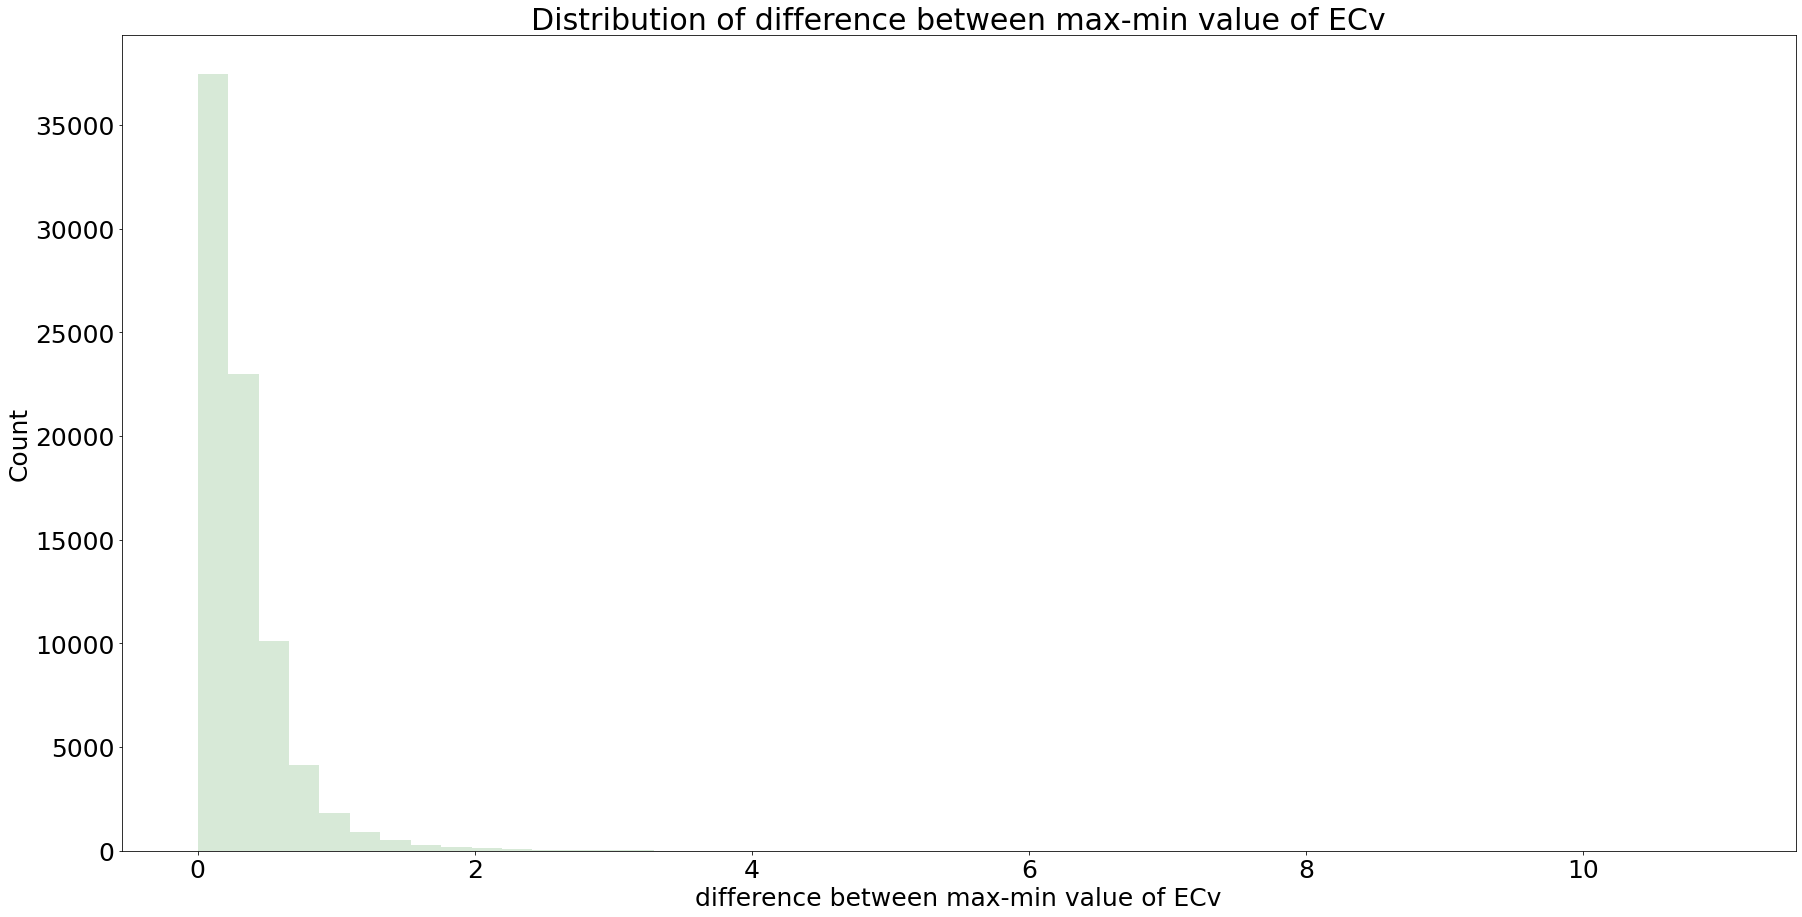

In [39]:
# figure
plt.figure(figsize=(30, 15))
plt.rcParams["font.family"] = 'sans-serif'
plt.rcParams['font.size'] = 25
plt.title(f'Distribution of difference between max-min value of ECv', fontsize=30)
plt.xlabel('difference between max-min value of ECv', fontsize=25)
plt.ylabel('Count', fontsize=25)
sns.distplot(list_ecv_maxmin, color="#9BC99B", kde=False)
# save
savepath = f'./result/fig/IDEA1_2/3_scatterplot_diff_maxmin_ecv/fig_scatterplot_diff_maxmin_ecv.png'
plt.savefig(savepath, dpi=300, format='png', bbox_inches="tight")
print(f'[SAVE]: {savepath}')

In [ ]:
# calculate difference between max-min value of ecv
def cal_ecv_maxmin():
    list_ecv_maxmin = []
    for i in range(len(data_ecv)):
        ecv_max = data_ecv.iloc[i, 2:].max()
        ecv_min = data_ecv.iloc[i, 2:].min()
        ecv_maxmin = abs(ecv_max - ecv_min)
        list_ecv_maxmin.append(ecv_maxmin)
    # figure
    plt.figure(figsize=(30, 15))
    plt.rcParams["font.family"] = 'sans-serif'
    plt.rcParams['font.size'] = 25
    plt.title(f'Distribution of range between max-min value of ECv', fontsize=30)
    plt.xlabel('range between max-min value of ECv', fontsize=25)
    plt.ylabel('Count', fontsize=25)
    sns.distplot(list_ecv_maxmin, color="#9BC99B", kde=False)
    # save
    savepath = f'./result/fig/IDEA1_2/3_scatterplot_range_ecv/fig_scatterplot_range_ecv.png'
    plt.savefig(savepath, dpi=300, format='png', bbox_inches="tight")
    print(f'[SAVE]: {savepath}')
    return list_ecv_maxmin

In [ ]:
# calculate difference between max-min value of ecv
